In [1]:
import pandas as pd
import numpy as np
import time
from pandas import Series
from matplotlib.pyplot import figure
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from datetime import datetime, timedelta
import re
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels import tsa
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import calendar
from matplotlib.dates import MONDAY
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import patsy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
pd.options.display.max_columns = 100
from sklearn.preprocessing import Imputer

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Four years (2013- 2017)

In [2]:
df = pd.read_csv('Crime_Data.csv')
df = pd.DataFrame(df)
df['date'] = pd.to_datetime(df['Occurred Date'],infer_datetime_format=True)
mask1 = (df['date'] > '2012-12-31') & (df['date'] <'2018-01-01')

In [3]:
df1 = df.loc[mask1] 
df1= df1[df1['Crime Subcategory'].isin(['CAR PROWL'])]
df1

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,date
110014,20140000902903,03/20/2014,100.0,03/20/2014,1210.0,CAR PROWL,THEFT-CARPROWL,EAST,G,G2,CENTRAL AREA/SQUIRE PARK,2014-03-20
110015,20140000903121,03/20/2014,50.0,03/21/2014,2111.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E3,CAPITOL HILL,2014-03-20
110016,2014000085074,03/20/2014,30.0,03/20/2014,759.0,CAR PROWL,THEFT-CARPROWL,EAST,C,C2,CENTRAL AREA/SQUIRE PARK,2014-03-20
110018,2014000091993,03/20/2014,0.0,03/26/2014,1235.0,CAR PROWL,THEFT-LICENSE PLATE,NORTH,N,N1,BITTERLAKE,2014-03-20
110019,2014000084870,03/20/2014,0.0,03/20/2014,21.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E2,CAPITOL HILL,2014-03-20
110020,2014000085684,03/20/2014,0.0,03/20/2014,1744.0,CAR PROWL,THEFT-CARPROWL,SOUTHWEST,W,W3,FAUNTLEROY SW,2014-03-20
110021,20140000903177,03/21/2014,2345.0,03/24/2014,1456.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E1,CAPITOL HILL,2014-03-21
110022,20140000902068,03/21/2014,2345.0,03/22/2014,958.0,CAR PROWL,THEFT-CARPROWL,NORTH,B,B1,BALLARD SOUTH,2014-03-21
110023,2014000087537,03/21/2014,2330.0,03/22/2014,1300.0,CAR PROWL,THEFT-CARPROWL,WEST,Q,Q2,QUEEN ANNE,2014-03-21
110024,20140000903190,03/21/2014,2330.0,03/25/2014,1013.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E3,CAPITOL HILL,2014-03-21


In [4]:
df1['Neighborhood'].value_counts()

DOWNTOWN COMMERCIAL                 5722
QUEEN ANNE                          5020
CAPITOL HILL                        4027
NORTHGATE                           3709
SLU/CASCADE                         3283
BELLTOWN                            3263
ROOSEVELT/RAVENNA                   3202
UNIVERSITY                          2453
BALLARD SOUTH                       1969
BALLARD NORTH                       1819
FIRST HILL                          1725
WALLINGFORD                         1699
SANDPOINT                           1588
GREENWOOD                           1585
MAGNOLIA                            1512
CENTRAL AREA/SQUIRE PARK            1486
SODO                                1410
FREMONT                             1287
BITTERLAKE                          1282
MADRONA/LESCHI                      1265
CHINATOWN/INTERNATIONAL DISTRICT    1217
MOUNT BAKER                         1100
NORTH BEACON HILL                   1057
LAKECITY                            1040
MONTLAKE/PORTAGE

In [5]:
dt= df1[df1['Neighborhood'].isin(['BELLTOWN','DOWNTOWN COMMERCIAL', 'CAPITOL HILL',
                                 'CHINATOWN/INTERNATIONAL DISTRICT','FIRST HILL',
                                  'PIONEER SQUARE','SLU/CASCADE','SODO'])]

In [6]:
dt['Neighborhood'].value_counts()

DOWNTOWN COMMERCIAL                 5722
CAPITOL HILL                        4027
SLU/CASCADE                         3283
BELLTOWN                            3263
FIRST HILL                          1725
SODO                                1410
CHINATOWN/INTERNATIONAL DISTRICT    1217
PIONEER SQUARE                       716
Name: Neighborhood, dtype: int64

In [7]:
dt

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,date
110015,20140000903121,03/20/2014,50.0,03/21/2014,2111.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E3,CAPITOL HILL,2014-03-20
110019,2014000084870,03/20/2014,0.0,03/20/2014,21.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E2,CAPITOL HILL,2014-03-20
110021,20140000903177,03/21/2014,2345.0,03/24/2014,1456.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E1,CAPITOL HILL,2014-03-21
110024,20140000903190,03/21/2014,2330.0,03/25/2014,1013.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E3,CAPITOL HILL,2014-03-21
110025,2014000087171,03/21/2014,2325.0,03/21/2014,2331.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E2,CAPITOL HILL,2014-03-21
110029,2014000087509,03/21/2014,2300.0,03/22/2014,859.0,CAR PROWL,THEFT-CARPROWL,EAST,C,C1,CAPITOL HILL,2014-03-21
110035,2014000087356,03/21/2014,2230.0,03/22/2014,352.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E2,CAPITOL HILL,2014-03-21
214567,20130000974,01/01/2013,2002.0,01/01/2013,2002.0,CAR PROWL,THEFT-CARPROWL,WEST,M,M2,SLU/CASCADE,2013-01-01
214577,20130000900085,01/01/2013,1800.0,01/02/2013,1228.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E3,FIRST HILL,2013-01-01
214592,20130000900182,01/01/2013,1530.0,01/04/2013,1549.0,CAR PROWL,THEFT-CARPROWL,EAST,E,E3,FIRST HILL,2013-01-01


In [8]:
dtg = dt.groupby(['date']).count()

In [9]:
dtg.head()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
date,,,,,,,,,,,
2013-01-01,9,9,9,9,9,9,9,9,9,9,9
2013-01-02,8,8,8,8,8,8,8,8,8,8,8
2013-01-03,10,10,10,10,10,10,10,10,10,10,10
2013-01-04,12,12,12,12,12,12,12,12,12,12,12
2013-01-05,5,5,5,5,5,5,5,5,5,5,5


In [10]:
# Creating rows for days with no crimes
idx = pd.date_range('01-01-2013', '12-31-2017')
dtg.index = pd.DatetimeIndex(dtg.index)
dtg = dtg.reindex(idx, fill_value=0)

In [11]:
dtg['date']=dtg.index

In [12]:
dtg=dtg[['date','Neighborhood']]

In [13]:
dtg['Crime Count'] = dtg['Neighborhood']

In [14]:
dtg=dtg[['date','Crime Count']]

In [15]:
dtg['Crime Count'].sum()

21363

In [16]:
dtg['day_of_week']=dtg['date'].dt.dayofweek

In [17]:
#The day of the week with Monday=0, Sunday=6
x= dtg.groupby('day_of_week')['Crime Count'].sum()

Text(0.5,1,'Downtown Car Prowls by Day of Week')

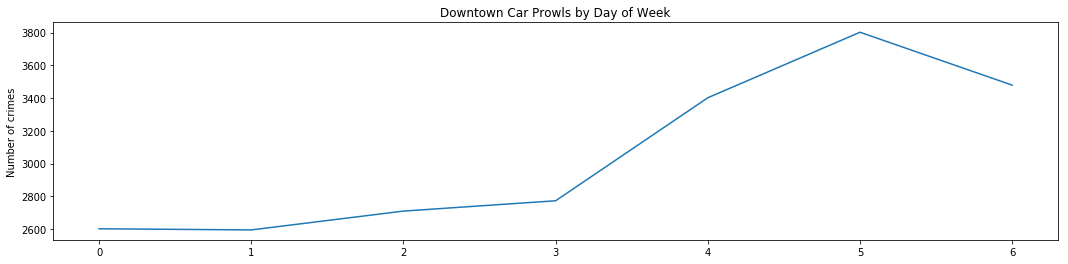

In [25]:
plt.figure(figsize=[18,4]) 
plt.plot(x)
plt.ylabel('Number of crimes')
plt.title('Downtown Car Prowls by Day of Week')

In [19]:
dtg['day_of_month'] = dtg['date'].dt.day
dtg.head()

,date,Crime Count,day_of_week,day_of_month
2013-01-01,2013-01-01,9,1,1
2013-01-02,2013-01-02,8,2,2
2013-01-03,2013-01-03,10,3,3
2013-01-04,2013-01-04,12,4,4
2013-01-05,2013-01-05,5,5,5


In [20]:
dtg.groupby('day_of_month')['Crime Count'].sum()
x2 = dtg.groupby('day_of_month')['Crime Count'].sum()

Text(0.5,1,'Downtown Car Prowls by Day of Month')

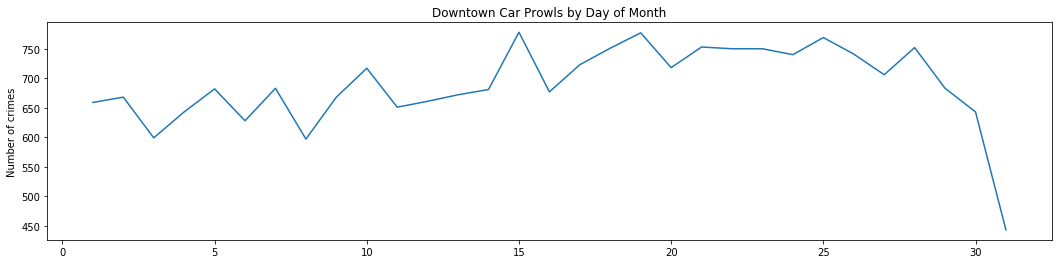

In [26]:
plt.figure(figsize=[18,4]) 
plt.plot(x2)
plt.ylabel('Number of crimes')
plt.title('Downtown Car Prowls by Day of Month')

In [22]:
dtg['month'] = dtg['date'].dt.month

In [23]:
x3 = dtg.groupby('month')['Crime Count'].sum()
dtg.groupby('month')['Crime Count'].sum()

month
1     1657
2     1400
3     1617
4     1861
5     1954
6     1673
7     1902
8     1876
9     1883
10    1984
11    1844
12    1712
Name: Crime Count, dtype: int64

Text(0.5,1,'Downtown Car Prowls by Month')

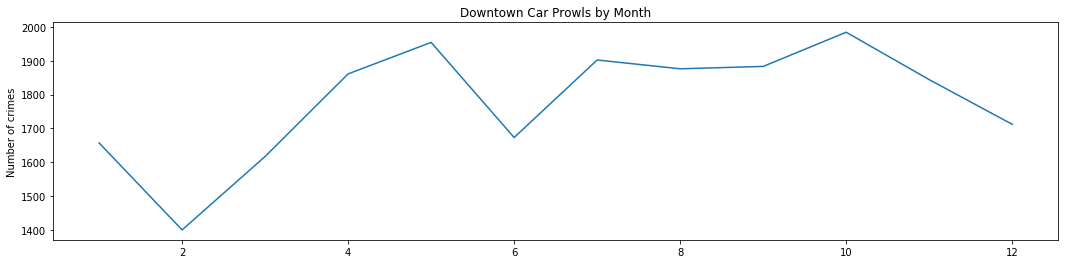

In [27]:
plt.figure(figsize=[18,4]) 
plt.plot(x3)
plt.ylabel('Number of crimes')
plt.title('Downtown Car Prowls by Month')

In [28]:
dtg['year'] = dtg['date'].dt.year

In [29]:
x4 = dtg.groupby('year')['Crime Count'].sum()
dtg.groupby('month')['Crime Count'].sum()

month
1     1657
2     1400
3     1617
4     1861
5     1954
6     1673
7     1902
8     1876
9     1883
10    1984
11    1844
12    1712
Name: Crime Count, dtype: int64

Text(0.5,1,'Downtown Car Prowls by Year')

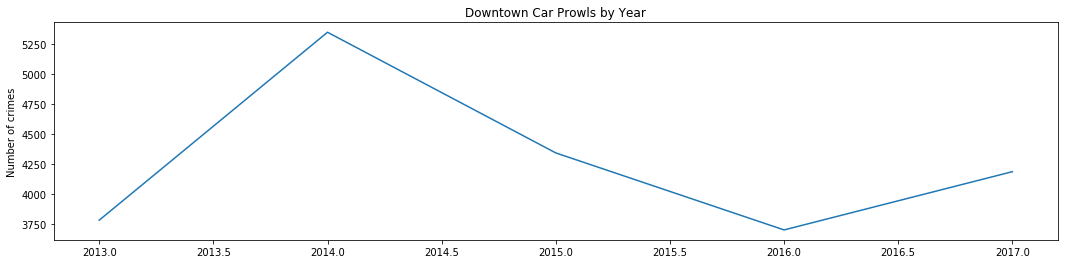

In [31]:
plt.figure(figsize=[18,4]) 
plt.plot(x4)
plt.ylabel('Number of crimes')
plt.title('Downtown Car Prowls by Year')

In [32]:
dtg.groupby('year')['Crime Count'].sum()

year
2013    3784
2014    5346
2015    4343
2016    3703
2017    4187
Name: Crime Count, dtype: int64

In [124]:
dtg.head(20)

,date,Crime Count,day_of_week,day_of_month,month,year,sday_of_week,sday_of_month,smonth
2013-01-01,2013-01-01,1,1,1,1,2013,1,1,1
2013-01-02,2013-01-02,1,2,2,1,2013,2,2,1
2013-01-03,2013-01-03,0,3,3,1,2013,3,3,1
2013-01-04,2013-01-04,3,4,4,1,2013,4,4,1
2013-01-05,2013-01-05,5,5,5,1,2013,5,5,1
2013-01-06,2013-01-06,1,6,6,1,2013,6,6,1
2013-01-07,2013-01-07,1,0,7,1,2013,0,7,1
2013-01-08,2013-01-08,0,1,8,1,2013,1,8,1
2013-01-09,2013-01-09,1,2,9,1,2013,2,9,1
2013-01-10,2013-01-10,1,3,10,1,2013,3,10,1


In [109]:
dtg['sday_of_week'] = [str(x) for x in dtg['day_of_week']]
dtg['sday_of_month'] = [str(x) for x in dtg['day_of_month']]
dtg['smonth'] = [str(x) for x in dtg['month']]
dow = patsy.dmatrix('sday_of_week',data=dtg,return_type='dataframe')
dom = patsy.dmatrix('sday_of_month',data=dtg,return_type='dataframe')
mth = patsy.dmatrix('smonth',data=dtg,return_type='dataframe')

In [110]:
dtg.head()

,date,Crime Count,day_of_week,day_of_month,month,year,sday_of_week,sday_of_month,smonth
2013-01-01,2013-01-01,1,1,1,1,2013,1,1,1
2013-01-02,2013-01-02,1,2,2,1,2013,2,2,1
2013-01-03,2013-01-03,0,3,3,1,2013,3,3,1
2013-01-04,2013-01-04,3,4,4,1,2013,4,4,1
2013-01-05,2013-01-05,5,5,5,1,2013,5,5,1


In [111]:
tm = pd.concat([dtg['year'],dow,dom,mth], axis = 1)

In [112]:
tm

,year,Intercept,sday_of_week[T.1],sday_of_week[T.2],sday_of_week[T.3],sday_of_week[T.4],sday_of_week[T.5],sday_of_week[T.6],Intercept,sday_of_month[T.10],...,smonth[T.11],smonth[T.12],smonth[T.2],smonth[T.3],smonth[T.4],smonth[T.5],smonth[T.6],smonth[T.7],smonth[T.8],smonth[T.9]
2013-01-01,2013,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,2013,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-03,2013,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-04,2013,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-05,2013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-06,2013,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-07,2013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-08,2013,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-09,2013,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-10,2013,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
X =  tm[['year','sday_of_week[T.1]', 'sday_of_week[T.2]',
       'sday_of_week[T.3]', 'sday_of_week[T.4]', 'sday_of_week[T.5]',
       'sday_of_week[T.6]',
      'sday_of_month[T.10]', 'sday_of_month[T.11]',
       'sday_of_month[T.12]', 'sday_of_month[T.13]', 'sday_of_month[T.14]',
       'sday_of_month[T.15]', 'sday_of_month[T.16]', 'sday_of_month[T.17]',
       'sday_of_month[T.18]', 'sday_of_month[T.19]', 'sday_of_month[T.2]',
       'sday_of_month[T.20]', 'sday_of_month[T.21]', 'sday_of_month[T.22]',
       'sday_of_month[T.23]', 'sday_of_month[T.24]', 'sday_of_month[T.25]',
       'sday_of_month[T.26]', 'sday_of_month[T.27]', 'sday_of_month[T.28]',
       'sday_of_month[T.29]', 'sday_of_month[T.3]', 'sday_of_month[T.30]',
       'sday_of_month[T.31]', 'sday_of_month[T.4]', 'sday_of_month[T.5]',
       'sday_of_month[T.6]', 'sday_of_month[T.7]', 'sday_of_month[T.8]',
       'sday_of_month[T.9]',
      'smonth[T.10]', 'smonth[T.11]', 'smonth[T.12]',
       'smonth[T.2]', 'smonth[T.3]', 'smonth[T.4]', 'smonth[T.5]',
       'smonth[T.6]', 'smonth[T.7]', 'smonth[T.8]', 'smonth[T.9]']]
     

In [114]:
y = dtg['Crime Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  

In [115]:
features = ['year',
        'sday_of_week[T.1]', 'sday_of_week[T.2]',
        'sday_of_week[T.3]', 'sday_of_week[T.4]', 'sday_of_week[T.5]',
        'sday_of_week[T.6]'
       'sday_of_month[T.10]', 'sday_of_month[T.11]',
       'sday_of_month[T.12]', 'sday_of_month[T.13]', 'sday_of_month[T.14]',
       'sday_of_month[T.15]', 'sday_of_month[T.16]', 'sday_of_month[T.17]',
       'sday_of_month[T.18]', 'sday_of_month[T.19]', 'sday_of_month[T.2]',
       'sday_of_month[T.20]', 'sday_of_month[T.21]', 'sday_of_month[T.22]',
       'sday_of_month[T.23]', 'sday_of_month[T.24]', 'sday_of_month[T.25]',
       'sday_of_month[T.26]', 'sday_of_month[T.27]', 'sday_of_month[T.28]',
       'sday_of_month[T.29]', 'sday_of_month[T.3]', 'sday_of_month[T.30]',
       'sday_of_month[T.31]'
       'sday_of_month[T.4]', 'sday_of_month[T.5]',
       'sday_of_month[T.6]', 'sday_of_month[T.7]', 'sday_of_month[T.8]',
       'sday_of_month[T.9]', 'smonth[T.10]', 'smonth[T.11]', 'smonth[T.12]',
       'smonth[T.2]', 'smonth[T.3]', 'smonth[T.4]', 'smonth[T.5]',
       'smonth[T.6]', 'smonth[T.7]', 'smonth[T.8]', 'smonth[T.9]' ]

In [146]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
y_pred = model1.predict(X_test)
y_predint = [round(x) for x in y_pred]
print (model1.score(X_test, y_test))
print (model1.score(X_train, y_train))
print(mean_squared_error(y_test, y_predint))
print(mean_squared_error(y_test, y_pred))

0.07199932063529701
0.10833544478264633
2.2883211678832116
1.9124253970523057


In [123]:
co = list (zip(features,abs(model1.coef_)))
dfco = pd.DataFrame(co)
dfco.sort_values(by=[1], ascending=False)

,0,1
6,sday_of_week[T.6]sday_of_month[T.10],0.265924
5,sday_of_week[T.5],0.231223
35,smonth[T.10],0.181368
22,sday_of_month[T.25],0.176677
0,year,0.173557
8,sday_of_month[T.12],0.169750
45,smonth[T.9],0.169468
21,sday_of_month[T.24],0.168740
27,sday_of_month[T.3],0.167900
43,smonth[T.7],0.163903


In [317]:
dtg

,date,Crime Count,day_of_week,day_of_month,month,year,sday_of_week,sday_of_month,smonth,mth_end
date,,,,,,,,,,
2013-01-01,2013-01-01,1,1,1,1,2013,1,1,1,0
2013-01-02,2013-01-02,1,2,2,1,2013,2,2,1,0
2013-01-04,2013-01-04,3,4,4,1,2013,4,4,1,0
2013-01-05,2013-01-05,5,5,5,1,2013,5,5,1,0
2013-01-06,2013-01-06,1,6,6,1,2013,6,6,1,0
2013-01-07,2013-01-07,1,0,7,1,2013,0,7,1,0
2013-01-09,2013-01-09,1,2,9,1,2013,2,9,1,0
2013-01-10,2013-01-10,1,3,10,1,2013,3,10,1,0
2013-01-12,2013-01-12,1,5,12,1,2013,5,12,1,0


In [139]:
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [140]:
model1 = LinearRegression()
model1.fit(X_train_pca, y_train)
y_pred_pca = model1.predict(X_test_pca)

In [141]:
y_predintpca = [round(x) for x in y_pred_pca]
print (model1.score(X_test_pca, y_test))
print (model1.score(X_train_pca, y_train))
print(mean_squared_error(y_test, y_predintpca))

0.0172865165312569
0.03349097818827251
2.56021897810219


In [143]:
ybaseline=(y_test*0+np.mean(y_train))
ybaseline.head()

2015-09-26    1.766823
2017-02-27    1.766823
2013-10-26    1.766823
2014-02-20    1.766823
2016-01-26    1.766823
Name: Crime Count, dtype: float64

In [144]:
mean_squared_error(y_test, ybaseline)

2.0619762723534905

In [162]:
X2 =  tm[['year','sday_of_week[T.1]', 'sday_of_week[T.2]',
       'sday_of_week[T.3]', 'sday_of_week[T.4]', 'sday_of_week[T.5]',
       'sday_of_week[T.6]',
      'smonth[T.10]', 'smonth[T.11]', 'smonth[T.12]',
       'smonth[T.2]', 'smonth[T.3]', 'smonth[T.4]', 'smonth[T.5]',
       'smonth[T.6]', 'smonth[T.7]', 'smonth[T.8]', 'smonth[T.9]']]

In [163]:
y2 = dtg['Crime Count']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)  

In [444]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)
y2_predint = [round(x) for x in y2_pred]
print (model2.score(X2_test, y2_test))
print (model2.score(X2_train, y2_train))
print(mean_squared_error(y2_test, y2_predint))
print(mean_squared_error(y2_test, y2_pred))

0.08360803566877106
0.07996141145102298
1.9872262773722629
1.88850213713362


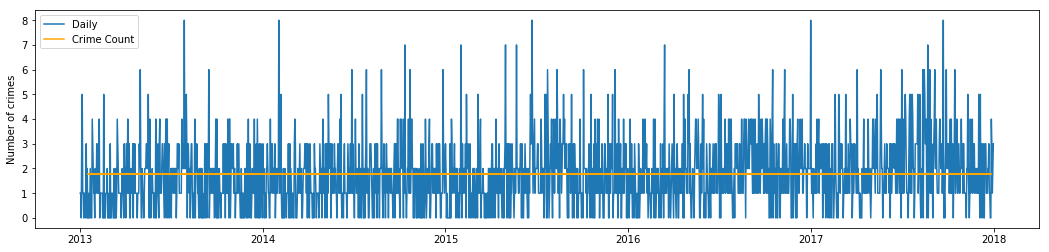

In [158]:
plt.figure(figsize=[18,4]) 
plt.plot(dtg['Crime Count'], label = 'Daily')

plt.plot(ybaseline,c = 'orange' )
plt.ylabel('Number of crimes')
plt.legend(loc='best')
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

The degree 1 had an MSE of: 1.8669366426121399
The degree 1 had an Rsquared of: -0.03244637764780099
The degree 1 had an MSE of: 1.8669366426121399
The degree 1 had an Rsquared of: -0.03244637764780099


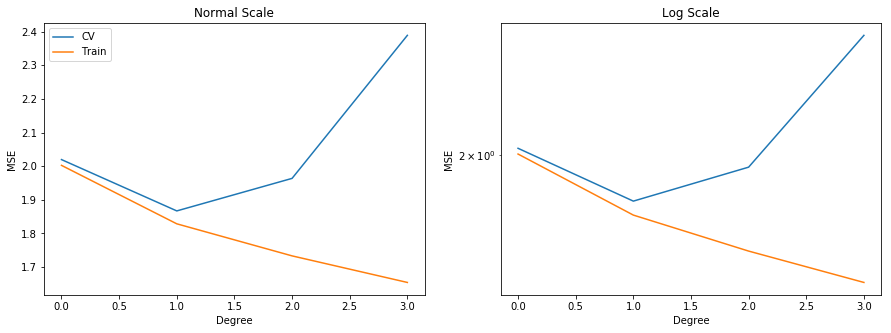

In [161]:
model = LinearRegression()
res_cv = {}
r2_cv = {}
res_train = {}
for degree in range(4):
    
    # transforms the data to polynomials
    poly = PolynomialFeatures(degree)
    X1 = poly.fit_transform(X2)
    
    # calculates the MSE for CV
    scores = cross_val_score(model, X1, y, cv=10, scoring='mean_squared_error') # cross val
    scoresr = cross_val_score(model, X1, y, cv=10, scoring='r2') 
    res_cv[degree] = np.mean(-scores)
    r2_cv[degree] = np.mean(-scoresr)
    
    # calculates the MSE for Training Set    
    model.fit(X1,y)
    y_pred = model.predict(X1)
    res_train[degree] = np.sum((y_pred-y)**2)/len(y)
    
degrees = list(res_cv.keys())
mse_cv = list(res_cv.values())
mse_train = list(res_train.values())
r2_cv = list(r2_cv.values())

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.plot(degrees,mse_cv)
plt.plot(degrees,mse_train)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Normal Scale')
plt.legend(['CV','Train'])

plt.subplot(1,2,2)
plt.semilogy(degrees,mse_cv)
plt.semilogy(degrees,mse_train)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Log Scale')

loc = np.argmin(list(res_cv.values()))
print('The degree',degrees[loc],'had an MSE of:',mse_cv[loc])
print('The degree',degrees[loc],'had an Rsquared of:',r2_cv[loc])
print('The degree',degrees[1],'had an MSE of:',mse_cv[1])
print('The degree',degrees[1],'had an Rsquared of:',r2_cv[1])

In [167]:
#RIDGE, DEGREE = 1
degree = 1
alphas = [1,10,100,1000, 10000]
sse_tr_Ridge = []
sse_te_Ridge = []
r2_tr_Ridge = []
r2_te_Ridge = []
for alpha in alphas:
    ridge1 = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=alpha))
    ridge1.fit(X2_train, y2_train)
    sse_tr_Ridge.append(mean_squared_error(y2_train, ridge1.predict(X2_train)))
    sse_te_Ridge.append(mean_squared_error(y2_test, ridge1.predict(X2_test)))
    r2_tr_Ridge.append(ridge1.score(X2_train,y2_train))
    r2_te_Ridge.append(ridge1.score(X2_test,y2_test))
print (sse_tr_Ridge)
print (sse_te_Ridge)
print (r2_tr_Ridge)
print (r2_te_Ridge)

[1.818851016087691, 1.81897978080651, 1.8244708150568443, 1.8660365295234618, 1.947610675557407]
[1.8882399928085791, 1.8861370103594362, 1.8783908777290517, 1.9175167893916008, 2.0250147916618886]
[0.07996067280219143, 0.07989553904235003, 0.07711797924629582, 0.056092567250419, 0.014829472159078927]
[0.08373524068921501, 0.08475570880499339, 0.0885145044968545, 0.06952873247166957, 0.01736553735256241]


In [185]:
dtg['weekend'] = np.where((dtg['day_of_week']==5 )| (dtg['day_of_week']==6) , 1, 0)

In [196]:
tm = pd.concat([dtg['year'],dtg['weekend'],mth], axis = 1)
tm.head()

,year,weekend,Intercept,smonth[T.10],smonth[T.11],smonth[T.12],smonth[T.2],smonth[T.3],smonth[T.4],smonth[T.5],smonth[T.6],smonth[T.7],smonth[T.8],smonth[T.9]
2013-01-01,2013,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,2013,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-03,2013,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-04,2013,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-05,2013,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
y4 = dtg['Crime Count']
X4_train, X4_test, y4_train, y4_test = train_test_split(tm, y4, test_size=0.3, random_state=42)
scaler = StandardScaler()
X4_train = scaler.fit_transform(X4_train)
X4_test = scaler.transform(X4_test)  

In [445]:
model4 = LinearRegression()
model4.fit(X4_train, y4_train)
y4_pred = model4.predict(X4_test)
y4_predint = [round(x) for x in y4_pred]
print (model4.score(X4_test, y4_test))
print (model4.score(X4_train, y4_train))
print(mean_squared_error(y4_test, y4_predint))
print(mean_squared_error(y4_test, y4_pred))

0.0945262238504091
0.07451944204657102
1.9653284671532847
1.8660019161395414


In [199]:
X5 =  tm[['year','weekend', 
      'smonth[T.10]', 'smonth[T.11]', 'smonth[T.12]',
       'smonth[T.2]', 'smonth[T.3]', 'smonth[T.4]', 'smonth[T.5]',
       'smonth[T.6]', 'smonth[T.7]', 'smonth[T.8]', 'smonth[T.9]']]

In [200]:
y5 = dtg['Crime Count']
X5_train, X5_test, y5_train, y5_test = train_test_split(tm, y5, test_size=0.3, random_state=42)
scaler = StandardScaler()
X5_train = scaler.fit_transform(X5_train)
X5_test = scaler.transform(X5_test) 

In [446]:
model5 = LinearRegression()
model5.fit(X5_train, y5_train)
y5_pred = model5.predict(X5_test)
y5_predint = [round(x) for x in y5_pred]
print (model5.score(X5_test, y5_test))
print (model5.score(X5_train, y5_train))
print(mean_squared_error(y5_test, y5_predint))
print(mean_squared_error(y5_test, y5_pred))

0.0945262238504091
0.07451944204657102
1.9653284671532847
1.8660019161395414


In [244]:
conditions = [
    (dtg['month'] == 1), 
    (dtg['month'] == 2), 
    (dtg['month'] == 3),  
    (dtg['month'] == 4), 
    (dtg['month'] == 5), 
    (dtg['month'] == 6), 
    (dtg['month'] == 7), 
    (dtg['month'] == 8), 
    (dtg['month'] == 9), 
    (dtg['month'] == 10), 
    (dtg['month'] == 11), 
    (dtg['month'] == 12)]
    
choices = [0, 0, 0, 0, 1, 1, 1,
           1, 1, 1, 2, 2]

dtg['season'] = np.select(conditions, choices)

In [257]:
dtg.sample(400)

,date,Crime Count,day_of_week,day_of_month,month,year,sday_of_week,sday_of_month,smonth,weekend,season
2016-05-20,2016-05-20,4,4,20,5,2016,4,20,5,0,1
2016-02-01,2016-02-01,1,0,1,2,2016,0,1,2,0,0
2014-08-05,2014-08-05,3,1,5,8,2014,1,5,8,0,1
2015-08-27,2015-08-27,4,3,27,8,2015,3,27,8,0,1
2013-07-08,2013-07-08,2,0,8,7,2013,0,8,7,0,1
2016-01-29,2016-01-29,1,4,29,1,2016,4,29,1,0,0
2013-03-16,2013-03-16,4,5,16,3,2013,5,16,3,1,0
2014-12-04,2014-12-04,2,3,4,12,2014,3,4,12,0,2
2017-10-27,2017-10-27,2,4,27,10,2017,4,27,10,0,1
2013-09-05,2013-09-05,0,3,5,9,2013,3,5,9,0,1


In [260]:
dtg['sseason'] = [str(x) for x in dtg['season']]
sea = patsy.dmatrix('sseason',data=dtg,return_type='dataframe')
tm = pd.concat([dtg['year'],dtg['weekend'],sea], axis = 1)
tm

,year,weekend,Intercept,sseason[T.1],sseason[T.2]
2013-01-01,2013,0,1.0,0.0,0.0
2013-01-02,2013,0,1.0,0.0,0.0
2013-01-03,2013,0,1.0,0.0,0.0
2013-01-04,2013,0,1.0,0.0,0.0
2013-01-05,2013,1,1.0,0.0,0.0
2013-01-06,2013,1,1.0,0.0,0.0
2013-01-07,2013,0,1.0,0.0,0.0
2013-01-08,2013,0,1.0,0.0,0.0
2013-01-09,2013,0,1.0,0.0,0.0
2013-01-10,2013,0,1.0,0.0,0.0


In [448]:
y6 = dtg['Crime Count']
X6_train, X6_test, y6_train, y6_test = train_test_split(tm, y6, test_size=0.3, random_state=42)
scaler = StandardScaler()
X6_train = scaler.fit_transform(X6_train)
X6_test = scaler.transform(X6_test) 

In [449]:
model6 = LinearRegression()
model6.fit(X6_train, y6_train)
y6_pred = model6.predict(X6_test)
y6_predint = [round(x) for x in y6_pred]
print (model6.score(X6_test, y6_test))
print (model6.score(X6_train, y6_train))
print(mean_squared_error(y6_test, y6_predint))
print(mean_squared_error(y6_test, y6_pred))

0.10234199272452404
0.06940726332374825
1.9288321167883211
1.8498951661934306


Text(0,0.5,'True Crime Number')

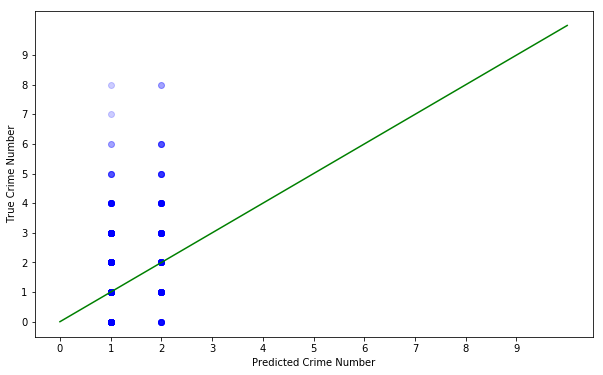

In [269]:
plt.figure(figsize=[10,6])
plt.scatter(y6_predint,y6_test, c = 'blue',alpha = .2)
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0, 10, 1))
b = plt.plot([0,10],[0,10], c = 'green')
plt.xlabel('Predicted Crime Number')
plt.ylabel('True Crime Number')


In [271]:
weather = pd.read_csv('1452977.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,11,12,13,14,15,16,17,19,20,23,25,26,27,28,29,33,34,44,45,46,47,72,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [279]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104827 entries, 0 to 104826
Data columns (total 90 columns):
STATION                              104827 non-null object
STATION_NAME                         104827 non-null object
ELEVATION                            104827 non-null float64
LATITUDE                             104827 non-null float64
LONGITUDE                            104827 non-null float64
DATE                                 104827 non-null object
REPORTTPYE                           104827 non-null object
HOURLYSKYCONDITIONS                  91203 non-null object
HOURLYVISIBILITY                     101199 non-null object
HOURLYPRSENTWEATHERTYPE              20527 non-null object
HOURLYDRYBULBTEMPF                   101190 non-null object
HOURLYDRYBULBTEMPC                   101190 non-null object
HOURLYWETBULBTEMPF                   100931 non-null object
HOURLYWETBULBTEMPC                   100931 non-null object
HOURLYDewPointTempF                  101074 non-

In [348]:
weather['date'] = pd.to_datetime(weather['DATE'],infer_datetime_format=True)
mask1 = (weather['date'] > '2013-01-01') & (weather['date'] <'2018-01-01')

In [389]:
w = weather.loc[mask1] 
w = w[['date', 'HOURLYPrecip', 'HOURLYDRYBULBTEMPF']]

In [390]:
w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53790 entries, 44009 to 97798
Data columns (total 3 columns):
date                  53790 non-null datetime64[ns]
HOURLYPrecip          44833 non-null object
HOURLYDRYBULBTEMPF    51905 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ MB


In [391]:
w['dateonly'] = w['date'].dt.date

#Replacing values with "s" in them with NA
#Replacing "Trace" precipitation with 0
replacements = {
   'HOURLYDRYBULBTEMPF': {
      r'(.*s)': np.NaN,
      r'(\*)': np.NaN}
}
w.replace(replacements, regex=True, inplace=True)

replacements = {
   'HOURLYPrecip': {
      r'(.*s)': np.NaN,
    r'T': 0.00}
}
w.replace(replacements, regex=True, inplace=True)


In [427]:
w['temp'] = [float(x) for x in w['HOURLYDRYBULBTEMPF']]
w['prec'] = [float(x) for x in w['HOURLYPrecip']]
wgroup = w.groupby('dateonly')['prec'].mean()
# wgroup = w.groupby('dateonly')['temp'].mean()
# 0.09688805221103203
# 0.07182187314281008
# 2.2226277372262775
# 1.8611346561894453
# wgroup = w.groupby('dateonly')['prec','temp'].mean()
# 0.09837925089924227
# 0.07186786756126973
# 2.228102189781022
# 1.858061591366544

In [428]:
dfplus = dtg.join(wgroup)

In [429]:
X7 = tm.join(wgroup)
X7.interpolate(inplace=True)

In [424]:
null_columns=X7.columns[X7.isnull().any()]
print(X7[X7["temp"].isnull()][null_columns])

Empty DataFrame
Columns: []
Index: []


In [430]:
y7 = dtg['Crime Count']
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=42)
scaler = StandardScaler()
X7_train = scaler.fit_transform(X7_train)
X7_test = scaler.transform(X7_test)

In [450]:
model7 = LinearRegression()
model7.fit(X7_train, y7_train)
y7_pred = model7.predict(X7_test)
y7_predint = [round(x) for x in y7_pred]
print (model7.score(X7_test, y7_test))
print (model7.score(X7_train, y7_train))
print(mean_squared_error(y7_test, y7_predint))
print(mean_squared_error(y7_test, y7_pred))

0.10395020799143428
0.06946284321783691
1.9324817518248176
1.8465809534037676


In [451]:
array(y7_predint)

array([2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 1., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 1., 2., 2., 1., 2., 1., 1., 3., 2., 2., 2., 1., 1., 2., 2.,
       1., 2., 1., 2., 1., 2., 2., 1., 1., 3., 1., 1., 2., 2., 2., 1., 2.,
       2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 3., 1., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 1., 2., 3., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 3., 1., 2., 1., 2., 2., 1., 1., 3., 2.,
       2., 2., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2.,
       2., 1., 2., 2., 2.

NameError: name 'dfplus' is not defined